In [2]:
import pandas as pd
import seaborn as sns

1. Wczytaj plik `nauczyciele.csv`, w którym znajdują się dane odnośnie zatrudnienia nauczycieli akademickich w Polsce w wybranych latach, z podziałem na stanowisko i płeć. Rozróżnione są dodatkowo uniwersystety i szkoły techniczne.

In [3]:
# plik został wcześniej delikatnie zmodyfikowany w edytorze tekstowym:
# zamieniono ',' na '.' a następnie delimiter ustawiono na przecinek

teachers = pd.read_csv('nauczyciele.csv')
teachers

,Kod,Nazwa,"nauczyciele akademiccy,ogółem,uniwersytety,2014,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2015,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2016,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2017,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2018,[osoba]","nauczyciele akademiccy,ogółem,wyższe szkoły techniczne,2014,[osoba]","nauczyciele akademiccy,ogółem,wyższe szkoły techniczne,2015,[osoba]","nauczyciele akademiccy,ogółem,wyższe szkoły techniczne,2016,[osoba]",...,"asystenci,kobiety,uniwersytety,2015,[osoba]","asystenci,kobiety,uniwersytety,2016,[osoba]","asystenci,kobiety,uniwersytety,2017,[osoba]","asystenci,kobiety,uniwersytety,2018,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2014,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2015,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2016,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2017,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2018,[osoba]",Unnamed: 102
0,0,POLSKA,31928.1,31700.2,31838.5,31991.3,31560.8,19959.6,19804.8,19701.9,...,2202.0,2303.6,2415.6,2215.3,1050.6,1066.2,1081.2,1072.6,937.0,NaN
1,200000,DOLNOŚLĄSKIE,1837.7,1856.7,1884.5,1919.2,1930.9,2003.3,2028.6,2051.7,...,46.6,58.3,66.0,65.7,108.8,108.5,111.5,107.3,99.2,NaN
2,400000,KUJAWSKO-POMORSKIE,2689.9,2651.1,2647.4,2721.4,2684.8,0.0,0.0,0.0,...,262.7,276.8,311.2,258.8,0.0,0.0,0.0,0.0,0.0,NaN
3,600000,LUBELSKIE,2912.0,2770.8,2721.5,2648.5,2578.0,549.0,568.9,587.7,...,265.0,269.5,243.5,230.9,42.0,42.0,49.0,47.0,47.0,NaN
4,800000,LUBUSKIE,899.0,884.5,920.0,1000.5,982.5,0.0,0.0,0.0,...,47.5,54.5,61.0,22.0,0.0,0.0,0.0,0.0,0.0,NaN
5,1000000,ŁÓDZKIE,2188.2,2159.2,2145.6,2157.7,2135.4,1432.6,1396.4,1368.7,...,133.2,133.5,130.8,121.9,41.5,42.3,31.7,29.3,21.8,NaN
6,1200000,MAŁOPOLSKIE,3879.4,3932.9,4022.4,4119.2,4120.7,3444.0,3395.2,3382.0,...,440.2,454.7,513.9,513.1,212.3,230.7,231.0,228.6,192.7,NaN
7,1400000,MAZOWIECKIE,4196.0,4259.0,4303.5,4332.0,4285.4,3055.9,3037.6,3045.2,...,174.8,206.0,229.3,229.1,112.2,108.5,115.0,115.8,124.6,NaN
8,1600000,OPOLSKIE,696.4,688.7,678.0,687.3,666.1,504.2,512.1,505.0,...,21.0,18.0,20.6,15.1,41.6,39.1,35.0,29.0,23.0,NaN
9,1800000,PODKARPACKIE,1275.8,1290.1,1306.6,1299.0,1253.7,771.0,771.4,777.8,...,114.8,127.5,139.5,115.5,56.2,54.8,57.3,72.3,70.3,NaN


### Przygotuj dane do dalszej analizy (usuń zbędne wiersze i kolumny, zwróć uwagę na typ danych)

In [4]:
teachers.drop(labels=["Unnamed: 102"], axis=1, inplace=True)
teachers.drop(index=0, inplace=True)
teachers.iloc[:,2:]=teachers.iloc[:,2:].astype('int32')

### Wykres przedstawiający sumę nauczycieli akademickich w latach 2014-2018

In [6]:
teachers_14_18_sum = pd.DataFrame(pd.concat([teachers.Nazwa, teachers.iloc[:,2:12].sum(axis=1)],axis=1))
teachers_14_18_sum.reset_index(drop=True, inplace=True)
teachers_14_18_sum.columns=['wojewodztwo', 'ile nauczycieli']
teachers_14_18_sum

,wojewodztwo,ile nauczycieli
0,DOLNOŚLĄSKIE,19631
1,KUJAWSKO-POMORSKIE,13392
2,LUBELSKIE,16497
3,LUBUSKIE,4685
4,ŁÓDZKIE,17535
5,MAŁOPOLSKIE,36890
6,MAZOWIECKIE,36536
7,OPOLSKIE,5895
8,PODKARPACKIE,10461
9,PODLASKIE,7015


<ipython-input-7-a1b18eac6686>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


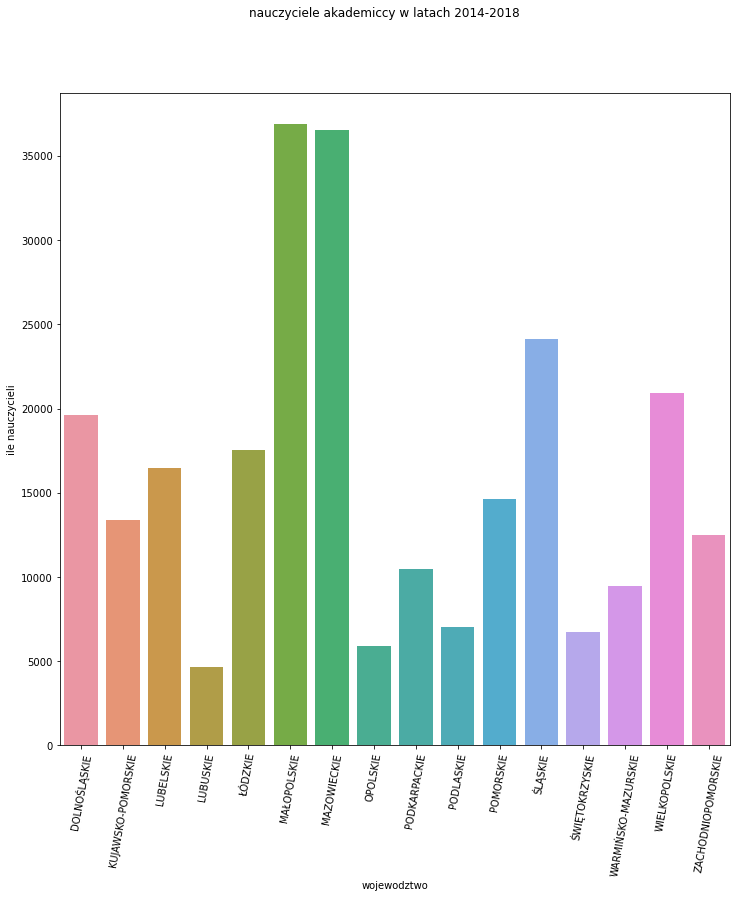

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt , ax = plt.subplots(figsize=(12,12))
sns_plot0 = sns.barplot(data=teachers_14_18_sum, x='wojewodztwo',y='ile nauczycieli', ax=ax)
sns_plot0.set_xticklabels(sns_plot0.get_xticklabels(), rotation=80)
plt.suptitle("nauczyciele akademiccy w latach 2014-2018")
plt.show()

## Suma osob na stanowiskach w woj. Śląskim

In [8]:
if_position = lambda x, position: position in x and not 'kobiety' in x
position_list=['asystenci','adiunkci','docenci','profesorowie','nauczyciele']

boolean_dict = {position: [if_position(col, position) 
                for col in teachers.columns]
                for position in position_list}

In [9]:
filter_slaskie = teachers["Nazwa"]=="ŚLĄSKIE"
stanowiska_ilosc={}
for key in boolean_dict:
    stanowiska_ilosc[key]=teachers.iloc[:,boolean_dict[key]].where(filter_slaskie).dropna().sum(axis=1)
DF_stanowiska=pd.DataFrame.from_dict(stanowiska_ilosc, orient='index').reset_index()
DF_stanowiska.columns=['stanowisko','ile']

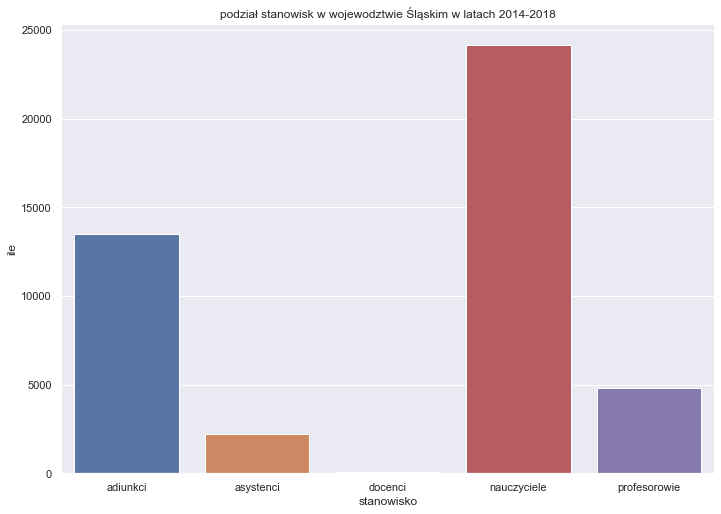

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot1 = sns.barplot(data=DF_stanowiska, x='stanowisko',y='ile').set_title(
    "podział stanowisk w wojewodztwie Śląskim w latach 2014-2018")

## Nauczyciele akademiccy na uni. w szkołach technicznych z podziałem na płcie w woj. Śląskim

In [11]:
female_teachers=pd.Series(teachers.iloc[12][12:22]).reset_index(drop=True)
male_teachers=pd.Series(teachers.iloc[12][2:12]).reset_index(drop=True)-female_teachers

data_dict={
    "females uni.":female_teachers[:5],
    "male uni.": male_teachers[:5],
    "females tech.":female_teachers[5:],
    "male tech.": male_teachers[5:]
}
data_dict_DF = pd.DataFrame.from_dict(data_dict).reset_index(drop=True).sum()
data_dict_DF=pd.DataFrame(data_dict_DF, columns=['ile'])

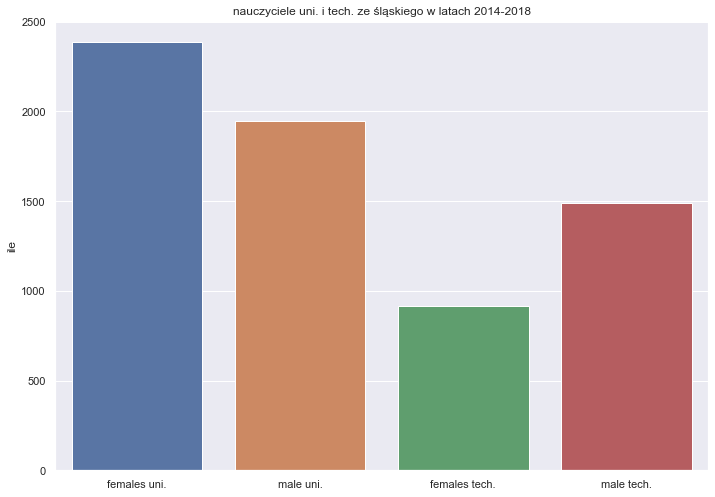

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot1 = sns.barplot(data=data_dict_DF,x=data_dict_DF.index, y='ile').set_title(
    "nauczyciele uni. i tech. ze śląskiego w latach 2014-2018")

## Znajdź
dane dla wojewodztwa slaskiego:

In [13]:
teachers.where(filter_slaskie).dropna(thresh=1)

,Kod,Nazwa,"nauczyciele akademiccy,ogółem,uniwersytety,2014,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2015,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2016,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2017,[osoba]","nauczyciele akademiccy,ogółem,uniwersytety,2018,[osoba]","nauczyciele akademiccy,ogółem,wyższe szkoły techniczne,2014,[osoba]","nauczyciele akademiccy,ogółem,wyższe szkoły techniczne,2015,[osoba]","nauczyciele akademiccy,ogółem,wyższe szkoły techniczne,2016,[osoba]",...,"asystenci,kobiety,uniwersytety,2014,[osoba]","asystenci,kobiety,uniwersytety,2015,[osoba]","asystenci,kobiety,uniwersytety,2016,[osoba]","asystenci,kobiety,uniwersytety,2017,[osoba]","asystenci,kobiety,uniwersytety,2018,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2014,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2015,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2016,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2017,[osoba]","asystenci,kobiety,wyższe szkoły techniczne,2018,[osoba]"
12,2400000.0,ŚLĄSKIE,1940.0,1941.0,1950.0,1930.0,1887.0,3040.0,2983.0,2925.0,...,139.0,145.0,151.0,138.0,113.0,106.0,110.0,107.0,99.0,93.0


woj. gdzie jest najmniej i najwiecej nauczycieli

In [14]:
teachers_14_18_sum.style.highlight_max(color="red").highlight_min(color="blue")

,wojewodztwo,ile nauczycieli
0,DOLNOŚLĄSKIE,19631
1,KUJAWSKO-POMORSKIE,13392
2,LUBELSKIE,16497
3,LUBUSKIE,4685
4,ŁÓDZKIE,17535
5,MAŁOPOLSKIE,36890
6,MAZOWIECKIE,36536
7,OPOLSKIE,5895
8,PODKARPACKIE,10461
9,PODLASKIE,7015


województwa, które zatrudniają kobiety ponad średnią

In [15]:
female_cols=['kobiety' in col for col in teachers.columns]
mean_females=teachers.loc[:,female_cols].sum(axis=1).mean(axis=0)

In [16]:
filter=teachers.loc[:,female_cols].sum(axis=1)>mean_females
teachers.where(filter)['Nazwa'].dropna()

1      DOLNOŚLĄSKIE
3         LUBELSKIE
5           ŁÓDZKIE
6       MAŁOPOLSKIE
7       MAZOWIECKIE
12          ŚLĄSKIE
15    WIELKOPOLSKIE
Name: Nazwa, dtype: object

# Plik 2, inflacja

In [17]:
inflacja = pd.read_excel('inflacja.xlsx')
inflacja.columns=inflacja.iloc[5]
inflacja=inflacja.iloc[6:39,2:15]
inflacja.reset_index(inplace=True)
inflacja.drop('index',axis='columns', inplace=True)
cols=list(inflacja.columns)
cols[0]='year'
inflacja.columns=cols

In [18]:
import re
inflacja.iloc[:,1:]=inflacja.iloc[:,1:].astype('float64')
def to_int(x):

    if isinstance(x, str): return int(re.sub("[^0-9]", "", x))
    return x

inflacja.iloc[:,0] = [to_int(year) 
for year in inflacja.iloc[:,0]]

In [19]:
inflacja.index=inflacja.year
inflacja.drop('year', axis='columns', inplace=True)
inflacja

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
year,,,,,,,,,,,,
2019,99.8,100.2,100.5,101.6,101.9,102.2,102.2,102.2,102.2,102.4,NaN,NaN
2018,100.3,100.1,100,100.5,100.6,100.7,100.6,100.5,100.7,101.1,101.1,101.1
2017,100.4,100.7,100.7,100.9,101,100.8,100.6,100.5,100.9,101.4,101.9,102.1
2016,99.5,99.4,99.5,99.8,99.9,100.1,99.8,99.5,99.5,100.1,100.2,100.8
2015,99.8,99.6,99.8,100.3,100.3,100.3,100.2,99.9,99.6,99.7,99.6,99.5
2014,100.1,100.2,100.3,100.2,100.1,100.1,99.9,99.5,99.4,99.5,99.2,99
2013,100.1,100,100.2,100.6,100.5,100.5,100.8,100.5,100.5,100.7,100.5,100.7
2012,100.7,101.1,101.7,102.2,102.4,102.6,102.1,101.8,101.9,102.3,102.3,102.4
2011,101.2,101.4,102.3,102.9,103.5,103.1,102.8,102.7,102.8,103.5,104.2,104.6


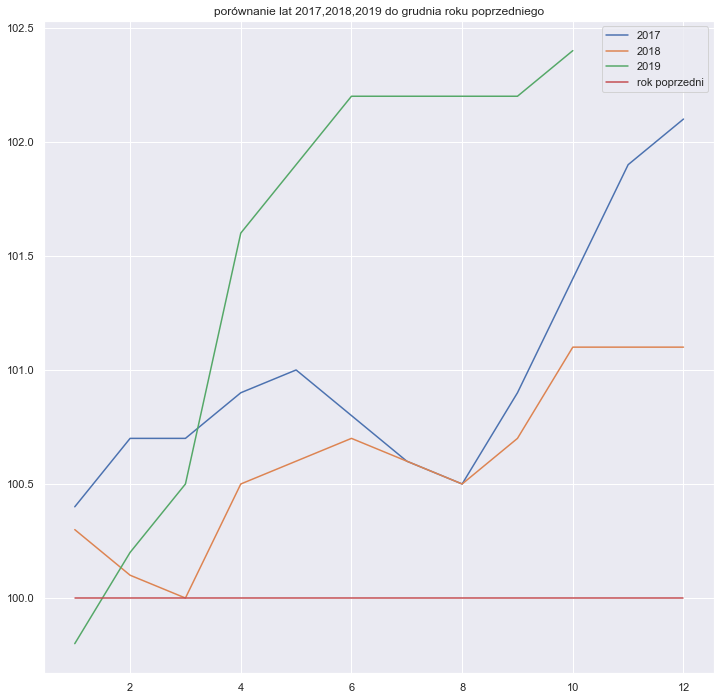

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fig, ax = plt.subplots(figsize=(12,12))
ax.plot(range(1,13), np.array(inflacja[inflacja.index == 2017]).reshape(12,1), label="2017")
ax.plot(range(1,13), np.array(inflacja[inflacja.index == 2018]).reshape(12,1), label="2018")
ax.plot(range(1,13), np.array(inflacja[inflacja.index == 2019]).reshape(12,1), label="2019")
ax.plot(range(1,13), [100]*12, label='rok poprzedni')
plt.title("porównanie lat 2017,2018,2019 do grudnia roku poprzedniego")
plt.legend()
plt.show()

- zestawienie października roku 2017, 2018 i 2019 w odniesieniu do poprzeniego miesiąca danego roku (Table 2)

In [21]:
table_2_df = pd.read_excel('inflacja.xlsx', sheet_name='Table 2')
del table_2_df['Analogiczny miesiąc poprzedniego roku = 100']
table_2_df.rename(columns={'Unnamed: 1':'year'}, inplace=True)
table_2_df.drop(table_2_df.index[38], inplace=True)
table_2_df.iloc[:,0] = [to_int(year) 
for year in table_2_df.iloc[:,0]]
table_2_df['year'] = table_2_df['year'].astype('int32')

In [22]:
table_2_df

,year,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
0,2019,100.7,101.2,101.7,102.2,102.4,102.6,102.9,102.9,102.6,102.5,NaN,NaN
1,2018,101.9,101.4,101.3,101.6,101.7,102.0,102.0,102.0,101.9,101.8,101.3,101.1
2,2017,101.7,102.2,102.0,102.0,101.9,101.5,101.7,101.8,102.2,102.1,102.5,102.1
3,2016,99.1,99.2,99.1,98.9,99.1,99.2,99.1,99.2,99.5,99.8,100.0,100.8
4,2015,98.6,98.4,98.5,98.9,99.1,99.2,99.3,99.4,99.2,99.3,99.4,99.5
5,2014,100.5,100.7,100.7,100.3,100.2,100.3,99.8,99.7,99.7,99.4,99.4,99.0
6,2013,101.7,101.3,101.0,100.8,100.5,100.2,101.1,101.1,101.0,100.8,100.6,100.7
7,2012,104.1,104.3,103.9,104.0,103.6,104.3,104.0,103.8,103.8,103.4,102.8,102.4
8,2011,103.6,103.6,104.3,104.5,105.0,104.2,104.1,104.3,103.9,104.3,104.8,104.6
9,2010,103.5,102.9,102.6,102.4,102.2,102.3,102.0,102.0,102.5,102.8,102.7,103.1


In [23]:
#table_2_df.where(table_2_df['year']==2017, columns=['X'])
def get_val_by_year_and_month(df, year, month):
    x=df.where((table_2_df['year']==year))
    return x.filter(items=[month]).dropna().iloc[0,0]

In [24]:
years=(2017, 2018, 2019)
prev_year = [100]*3
values = [get_val_by_year_and_month(table_2_df, i, 'X')-100 for i in range(2017, 2020)]

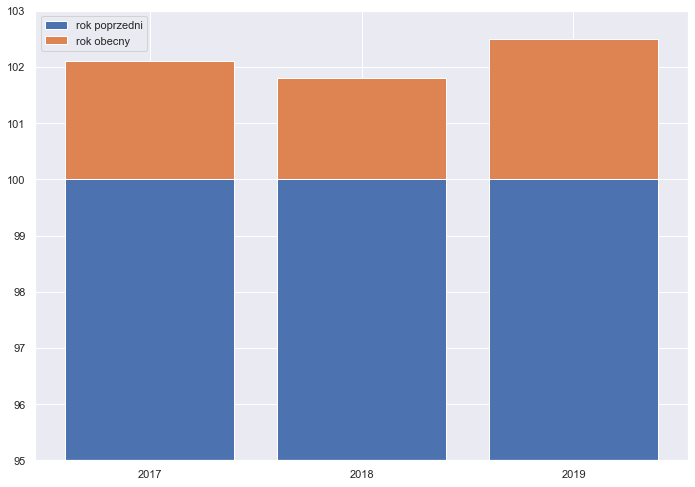

In [25]:
fig, ax = plt.subplots()
b1 = ax.bar(years, prev_year, label ='rok poprzedni')
b2 = ax.bar(years, values, bottom = prev_year, label ='rok obecny')
ax.axhline(0, color='grey', linewidth=0.8)
plt.ylim([95,103])
plt.xticks(years)
ax.legend()
plt.show()

In [26]:
table_3_df = pd.read_excel('inflacja.xlsx', sheet_name='Table 3', usecols=range(13))
table_3_df.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
table_3_df

,year,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
0,2019,100.7,101.0,101.2,101.5,101.7,101.8,102.0,102.1,102.1,102.2,NaN,NaN
1,2018,101.9,101.6,101.5,101.5,101.6,101.6,101.7,101.7,101.7,101.7,101.7,101.6
2,2017,101.7,102.0,102.0,102.0,102.0,101.9,101.9,101.9,101.9,101.9,102.0,102.0
3,2016,99.1,99.1,99.1,99.1,99.1,99.1,99.1,99.1,99.1,99.2,99.3,99.4
4,2015,98.6,98.5,98.5,98.6,98.7,98.8,98.8,98.9,98.9,99.0,99.0,99.1
5,2014,100.5,100.6,100.6,100.5,100.5,100.4,100.4,100.3,100.2,100.1,100.1,100.0
6,2013,101.7,101.5,101.3,101.2,101.0,100.9,100.9,100.9,101.0,100.9,100.9,100.9
7,2012,104.1,104.2,104.1,104.1,104.0,104.0,104.0,104.0,104.0,103.9,103.8,103.7
8,2011,103.6,103.6,103.8,104.0,104.2,104.2,104.2,104.2,104.2,104.2,104.2,104.3
9,2010,103.5,103.2,103.0,102.8,102.7,102.6,102.6,102.5,102.5,102.5,102.5,102.6


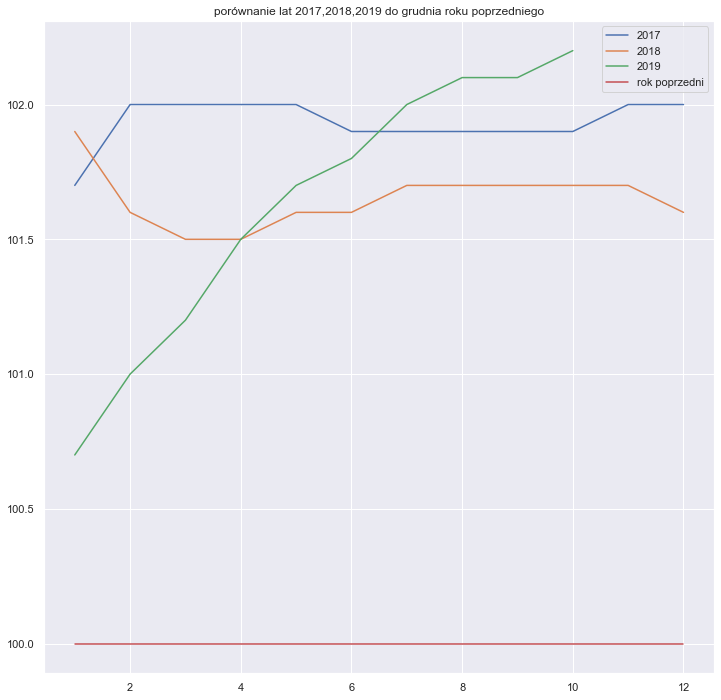

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(range(1,13), np.array(table_3_df[table_3_df.year == 2017].iloc[0,1:]).reshape(12,1), label="2017")
ax.plot(range(1,13), np.array(table_3_df[table_3_df.year == 2018].iloc[0,1:]).reshape(12,1), label="2018")
ax.plot(range(1,13), np.array(table_3_df[table_3_df.year == 2019].iloc[0,1:]).reshape(12,1), label="2019")
ax.plot(range(1,13), [100]*12, label='rok poprzedni')
plt.title("porównanie lat 2017,2018,2019 do grudnia roku poprzedniego")
plt.legend()
plt.show()

4. wyznacz wartości
- największą i najmeniejszą w każdej kategorii

In [28]:
inflacja.reset_index().iloc[:,1:].style.highlight_max(inflacja.columns, color='red' ,axis = None).highlight_min(inflacja.columns, color='blue',axis = None)

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
0,99.800000,100.200000,100.500000,101.600000,101.900000,102.200000,102.200000,102.200000,102.200000,102.400000,nan,nan
1,100.300000,100.100000,100.000000,100.500000,100.600000,100.700000,100.600000,100.500000,100.700000,101.100000,101.100000,101.100000
2,100.400000,100.700000,100.700000,100.900000,101.000000,100.800000,100.600000,100.500000,100.900000,101.400000,101.900000,102.100000
3,99.500000,99.400000,99.500000,99.800000,99.900000,100.100000,99.800000,99.500000,99.500000,100.100000,100.200000,100.800000
4,99.800000,99.600000,99.800000,100.300000,100.300000,100.300000,100.200000,99.900000,99.600000,99.700000,99.600000,99.500000
5,100.100000,100.200000,100.300000,100.200000,100.100000,100.100000,99.900000,99.500000,99.400000,99.500000,99.200000,99.000000
6,100.100000,100.000000,100.200000,100.600000,100.500000,100.500000,100.800000,100.500000,100.500000,100.700000,100.500000,100.700000
7,100.700000,101.100000,101.700000,102.200000,102.400000,102.600000,102.100000,101.800000,101.900000,102.300000,102.300000,102.400000
8,101.200000,101.400000,102.300000,102.900000,103.500000,103.100000,102.800000,102.700000,102.800000,103.500000,104.200000,104.600000
9,100.600000,100.900000,101.200000,101.600000,101.900000,102.200000,102.000000,101.500000,102.100000,102.600000,102.800000,103.100000


- wyznacz najwyższe wartości inflacji w poszczególnych latach

In [29]:
#inflacja.iloc[:,1:].style.highlight_max(inflacja.columns,axis=0, color='blue')
inflacja.reset_index().iloc[:,1:].style.highlight_max(inflacja.columns,axis=1, color='red')

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
0,99.800000,100.200000,100.500000,101.600000,101.900000,102.200000,102.200000,102.200000,102.200000,102.400000,nan,nan
1,100.300000,100.100000,100.000000,100.500000,100.600000,100.700000,100.600000,100.500000,100.700000,101.100000,101.100000,101.100000
2,100.400000,100.700000,100.700000,100.900000,101.000000,100.800000,100.600000,100.500000,100.900000,101.400000,101.900000,102.100000
3,99.500000,99.400000,99.500000,99.800000,99.900000,100.100000,99.800000,99.500000,99.500000,100.100000,100.200000,100.800000
4,99.800000,99.600000,99.800000,100.300000,100.300000,100.300000,100.200000,99.900000,99.600000,99.700000,99.600000,99.500000
5,100.100000,100.200000,100.300000,100.200000,100.100000,100.100000,99.900000,99.500000,99.400000,99.500000,99.200000,99.000000
6,100.100000,100.000000,100.200000,100.600000,100.500000,100.500000,100.800000,100.500000,100.500000,100.700000,100.500000,100.700000
7,100.700000,101.100000,101.700000,102.200000,102.400000,102.600000,102.100000,101.800000,101.900000,102.300000,102.300000,102.400000
8,101.200000,101.400000,102.300000,102.900000,103.500000,103.100000,102.800000,102.700000,102.800000,103.500000,104.200000,104.600000
9,100.600000,100.900000,101.200000,101.600000,101.900000,102.200000,102.000000,101.500000,102.100000,102.600000,102.800000,103.100000


### dlaczego poniższa metoda nie działa? kiedy indexami są lata, bez użycia .reset_index()
`inflacja.iloc[:,1:].style.highlight_max(inflacja.columns,axis=0, color='blue')`

## Średnia inflacja w każdym z lat

In [31]:
inflacja.mean(axis=1)

year
2019    101.520000
2018    100.608333
2017    100.991667
2016     99.841667
2015     99.883333
2014     99.791667
2013    100.466667
2012    101.958333
2011    102.916667
2010    101.875000
2009    102.758333
2008    102.375000
2007    102.058333
2006    101.000000
2005    100.525000
2004    102.650000
2003    100.841667
2002    100.933333
2001    102.500000
2000    105.491667
1999    105.216667
1998    106.458333
1997    107.850000
1996    111.158333
1995    113.033333
1994    114.400000
1993    118.175000
1992    124.675000
1991    137.591667
1990    272.491667
1989    287.741667
1988    144.175000
1987    118.783333
dtype: float64